변수명
- fastcampus
- fastcampus_copy

# PART 1. 데이터 전처리

In [41]:
# 필요한 라이브러리 생성

import numpy as np # 선형대수 계산 이용
import pandas as pd # 데이터 처리, 엑셀파일 임출력 (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")



In [42]:
# 원본데이터 로드
fastcampus = pd.read_excel("C:/Users/user/Documents/EDA 프로젝트/fast.xlsx")

print(fastcampus)

             id  customer_id  course_id     type      state  \
0        970634     504760.0   201435.0    ORDER  CANCELLED   
1        970650     432862.0   203178.0    ORDER  CANCELLED   
2        970657      72297.0   204246.0  PAYMENT  COMPLETED   
3        970656      72297.0   204246.0    ORDER  CANCELLED   
4        970658     478028.0   201797.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105414  1364995     640697.0   205365.0  PAYMENT  CANCELLED   
105415  1364998     670896.0   204159.0  PAYMENT  CANCELLED   
105416  1364996     640697.0   205365.0  PAYMENT  COMPLETED   
105417  1365005     670896.0   204159.0  PAYMENT  CANCELLED   
105418  1365007     610626.0   206720.0  PAYMENT  COMPLETED   

                           course_title category_title  format  \
0             올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍     올인원   
1           초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원   
2                  시크릿코드 : 프론트엔드 실무 완성편      

## PART 1-2. 데이터 정보요소 보기

In [43]:
 # 컬럼 정보 알기
fastcampus.columns

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [4]:
# 데이터 헤어정보 알기.
fastcampus.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [5]:
# 데이터 뒷부분 정보 알기
fastcampus.tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105418,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17


In [6]:
# 데이터의 행과 열의 차원 정보알기.
fastcampus.shape 

(105419, 18)

In [44]:
# 데이터의 전체적인 정보표시
fastcampus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [5]:
# 데이터의 빈값의 총 개수.
fastcampus.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

# PART 2-2. 데이터 전처리

### 결측치 처리

In [45]:
# 원본데이터 복사처리

fastcampus_copy = fastcampus.copy()

fastcampus_copy

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [49]:
# 분석에 필요없는 변수(열) 제거
fastcampus_copy = fastcampus_copy.drop(['course_id', 'tax_free_amount'], axis=1)

In [50]:
# 특정 열에 대한 빈값 제거.
fastcampus_copy = fastcampus_copy.dropna(subset = ['category_title','marketing_start_at'])
# fastcampus_copy.dropna(subset = ['marketing_start_at'])
fastcampus_copy

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,NaN,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [51]:
# 빈값의 다른 값으로 대체 1. 쿠폰 제목, 2. 쿠폰할인양, 3. 서브카테고리 제목 4, 판매가격, 5, pg, 6. 방법
fastcampus_copy['coupon_title'] = fastcampus_copy['coupon_title'].fillna('없음')
fastcampus_copy['coupon_discount_amount'] = fastcampus_copy['coupon_discount_amount'].fillna(0)  
fastcampus_copy['subcategory_title'] = fastcampus_copy['subcategory_title'].fillna('없음')
fastcampus_copy['sale_price'] = fastcampus_copy['sale_price'].fillna('transaction_amount')
fastcampus_copy['pg'] = fastcampus_copy['pg'].fillna('TOSS')
fastcampus_copy['sale_price'].fillna('transaction_amount')
fastcampus_copy['method'] = fastcampus_copy['method'].fillna('CASH')
fastcampus_copy
# 쿠폰할인 금액을 실수에서 정수로 바꾸는 방법은??

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [52]:
# 모든 전처리에 대한 확인
fastcampus_copy.isnull().sum()

id                        0
customer_id               0
type                      0
state                     0
course_title              0
category_title            0
format                    0
completed_at              0
transaction_amount        0
coupon_title              0
coupon_discount_amount    0
sale_price                0
pg                        0
method                    0
subcategory_title         0
marketing_start_at        0
dtype: int64

In [68]:
# 참고 무시하셔도 좋습니다.
# fastcampus_copy['customer_id'][fastcampus_copy['customer_id'].isna()]

Series([], Name: customer_id, dtype: float64)

In [62]:
# 참고 무시하셔도 좋습니다.
# fastcampus_copy.iloc[[12133, 36367, 91500]]

In [55]:
# customer_id에 대한 타입 변경(실수 -> 정수)
fastcampus_copy = fastcampus_copy.astype({'customer_id':'int'})
fastcampus_copy

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
5,970655,478028,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [62]:
# 카테고리 타이틀에서 데이터 사이언스를 데이터사이언스로 이름변경
fastcampus_copy = fastcampus_copy.replace("데이터 사이언스", "데이터사이언스")
fastcampus_copy

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
5,970655,478028,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [56]:
# 모든 데이터에 대한 타입 변경확인
fastcampus_copy.dtypes

id                                 int64
customer_id                        int32
type                              object
state                             object
course_title                      object
category_title                    object
format                            object
completed_at              datetime64[ns]
transaction_amount                 int64
coupon_title                      object
coupon_discount_amount           float64
sale_price                        object
pg                                object
method                            object
subcategory_title                 object
marketing_start_at        datetime64[ns]
dtype: object

In [57]:
# 결측치에 대한 정보 및 데이터 정보 다시확인.
fastcampus_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87440 entries, 1 to 105418
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      87440 non-null  int64         
 1   customer_id             87440 non-null  int32         
 2   type                    87440 non-null  object        
 3   state                   87440 non-null  object        
 4   course_title            87440 non-null  object        
 5   category_title          87440 non-null  object        
 6   format                  87440 non-null  object        
 7   completed_at            87440 non-null  datetime64[ns]
 8   transaction_amount      87440 non-null  int64         
 9   coupon_title            87440 non-null  object        
 10  coupon_discount_amount  87440 non-null  float64       
 11  sale_price              87440 non-null  object        
 12  pg                      87440 non-null  objec

# PART 3. 연관관계분석과 상관분석

In [58]:
# 연관관계 분석을 위한 카테고리 타이틀 제시
fastcampus['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [81]:
# 고객중에서 구매율이 많은 것을 추출.
fastcampus_copy.customer_id.value_counts().to_frame()

,customer_id
98685,69
50769,51
40783,50
23171,50
427973,48
...,...
535811,1
4310,1
18462,1
549787,1


In [63]:
# 고객ID 번호를 내림차순으로 분류
fastcampus_copy['customer_id'].sort_index(ascending=False).to_frame()

,customer_id
105418,610626
105417,670896
105416,640697
105415,670896
105414,640697
...,...
5,478028
4,478028
3,72297
2,72297


In [60]:
# 참고) 중복된거를 넣어서 데이터 분석을 할지 고민된다. 그냥 중복된것도 하나의 고객으로 인정해서 생각해보자.
# col_dup = fastcampus_copy['customer_id'].duplicated().sum()
# col_dup

41324

In [39]:
# 참고 fastcampus_copy_tmp['category_title']

In [40]:
# 참고 fastcampus_copy2_tmp.sort_values(by="customer_id")

In [108]:
# 참고 fastcampus_copy2_tmp['customer_id'][0]

432862

# PART 3-1. 연관분석 시작 apriori

In [66]:
# apriori 라이브러리 불러오기
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [26]:
# 참고 고객과 강의과목간 리스트로 만들어서 판단해야 맞다.
# fastcampus_copy_tmp=fastcampus_copy[['customer_id','category_title']]
# fastcampus_copy_tmp_arr=[[] for i in range(len(fastcampus_copy_tmp))]

# num=0
# for i in fastcampus_copy_tmp['category_title']:
#     fastcampus_copy_tmp_arr[fastcampus_copy_tmp['customer_id'][num]].append(i)
#     continue
#     num+=1

In [68]:
# Category_title 변수만 불러오기 
fastcampus_copy['category_title'].unique()

array(['영상/3D', '프로그래밍', '업무 생산성', '부동산/금융', '크리에이티브', '디자인', '데이터사이언스',
       '마케팅', '투자/재테크', '비즈니스', '지식콘텐츠', '교육'], dtype=object)

In [112]:
# category title 재분류.==> 재분류 기준: 비교적 많이 팔린 강의중 대분류에서 선택.
category = [['프로', '데이', '업무'],
            ['업무', '교육', '데이', '비즈'], 
            ['마케', '프로', '업무'],
            ['업무', '교육', '데이', '영상'],
           ]

In [113]:
# 어프라이어리 알고리즘을 적용하기 위한 전처리
te = TransactionEncoder()
te_ary = te.fit(category).transform(category)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,교육,데이,마케,비즈,업무,영상,프로
0,False,True,False,False,True,False,True
1,True,True,False,True,True,False,False
2,False,False,True,False,True,False,True
3,True,True,False,False,True,True,False


In [114]:
# 어프라이어리 적용결과
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(교육)
1,0.75,(데이)
2,1.00,(업무)
3,0.50,(프로)
4,0.50,"(데이, 교육)"
5,0.50,"(업무, 교육)"
6,0.75,"(업무, 데이)"
7,0.50,"(업무, 프로)"
8,0.50,"(업무, 데이, 교육)"


In [115]:
# 연관관계 결과값 도출
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(데이),(교육),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
1,(교육),(데이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
2,(업무),(교육),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
3,(교육),(업무),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
4,(업무),(데이),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
5,(데이),(업무),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
6,(업무),(프로),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
7,(프로),(업무),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
8,"(업무, 데이)",(교육),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(업무, 교육)",(데이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


# 연관관계 결론: antecedents(조건절=독립변수) VS consequents(결과절=종속변수)
# 향상도(lift) 값으로 우연인지 필연인지 판단.1이라면 우연적인 경우로, x와 y의 관계가 독립이지만, 1보다 크거나 작다면 우연이 아닌 필연적인 관계에 있다고 판단.
# 제일 구매율이 높았던 프로그래밍 보다는 다른 과목간의 구매율 많은 것으로 판단.

In [118]:
# 참고) sns.heatmap(frequent_itemsets, annot=True, cmap='Set2')

# PART 3-2. 데이터 분석 상관관계 분석

In [80]:
# 데이터 인코딩화 작업
def column_encode(data: pd.DataFrame, columns: str or list, inplace: bool = False) -> pd.DataFrame or pd.Series:
    if type(columns) == list:
        result = pd.Series()
        
        for column in columns:
            res = {}
            for key, value in zip(data[column].unique(), np.arange(len(data[column].unique()))):
                res[key] = value
        
            if inplace == True:
                data[column + '_encode'] = data[column].map(res)
            
            print('Encoding')
            print(res)
            result = pd.concat([result, data[column].map(res)], axis=1)
        
        result.drop([0], axis=1, inplace=True)
        return result
    
    elif type(columns) == str:
        res = {}
        for key, value in zip(data[columns].unique(), np.arange(len(data[columns].unique()))):
            res[key] = value
        print(res)
        if inplace == True:
            data[columns + '_encode'] = data[columns].map(res)
        return data[columns].map(res)

In [81]:
column_encode(data=fastcampus_copy, columns=['type', 'state', 'category_title', 'format', 'pg', 'method', 'subcategory_title'], inplace=True)

Encoding
{'ORDER': 0, 'PAYMENT': 1, 'REFUND': 2}
Encoding
{'CANCELLED': 0, 'COMPLETED': 1, 'PENDING': 2, 'DELETED': 3, 'REQUESTED': 4}
Encoding
{'영상/3D': 0, '프로그래밍': 1, '업무 생산성': 2, '부동산/금융': 3, '크리에이티브': 4, '디자인': 5, '데이터사이언스': 6, '마케팅': 7, '투자/재테크': 8, '비즈니스': 9, '지식콘텐츠': 10, '교육': 11}
Encoding
{'올인원': 0, '스쿨 온라인': 1, '온라인 완주반': 2, 'RED': 3, '캠프': 4, '스쿨': 5, '이벤트': 6, '하루10분컷': 7, '아카이브': 8, 'MBA': 9, 'B2B 온라인': 10}
Encoding
{'TOSS': 0, 'INICIS': 1, 'KAKAO': 2, 'CHAI': 3, 'PAYCO': 4, 'NAVER': 5}
Encoding
{'CARD': 0, 'VBANK': 1, 'TRANS': 2, 'PROMOTION': 3, 'TRANSFER': 4, 'ONSITE': 5, 'CASH': 6, 'POINT': 7, 'VOUCHER': 8}
Encoding
{'영상 편집': 0, '없음': 1, 'PPT/보고서': 2, '금융/투자 실무': 3, '프론트엔드 개발': 4, 'DevOps': 5, 'UX/UI': 6, '머신러닝': 7, '모션그래픽': 8, '딥러닝/인공지능': 9, '글쓰기/카피라이팅': 10, '엑셀/VBA': 11, '데이터분석': 12, '디자인툴': 13, '모바일앱': 14, 'SNS마케팅': 15, '게임': 16, '회계/재무/세무': 17, '부동산 개발': 18, '시각디자인': 19, '개발자 커리어': 20, '백엔드 개발': 21, '데이터마케팅': 22, '업무자동화': 23, '디지털마케팅': 24, '일러스트': 25, '코딩 입문': 26, '커

,type,state,category_title,format,pg,method,subcategory_title
1,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1
3,0,0,1,1,0,0,1
4,1,1,2,0,0,0,2
5,0,0,2,0,0,0,2
...,...,...,...,...,...,...,...
105414,1,0,0,0,1,2,0
105415,1,0,3,0,1,0,18
105416,1,1,0,0,1,1,0
105417,1,0,3,0,1,0,18


In [82]:
# 데이터 간 pearson 상관관계도 분석
fastcampus_copy.corr(method="pearson")

,id,customer_id,transaction_amount,coupon_discount_amount,type_encode,state_encode,category_title_encode,format_encode,pg_encode,method_encode,subcategory_title_encode
id,1.000000,0.192636,0.100821,0.095807,0.346227,0.219362,0.038552,-0.112014,0.416561,0.172915,0.234717
customer_id,0.192636,1.000000,0.010855,-0.034682,0.051913,0.007626,0.000686,-0.023394,0.088664,0.053700,0.022187
transaction_amount,0.100821,0.010855,1.000000,-0.154259,-0.242800,-0.100921,0.140155,-0.021561,0.060777,-0.046789,0.015848
coupon_discount_amount,0.095807,-0.034682,-0.154259,1.000000,0.191023,0.169182,0.026749,-0.101686,-0.069132,0.070014,0.078091
type_encode,0.346227,0.051913,-0.242800,0.191023,1.000000,0.684607,0.000241,-0.036642,0.087622,-0.029270,0.082325
state_encode,0.219362,0.007626,-0.100921,0.169182,0.684607,1.000000,0.015247,-0.008989,0.035056,-0.043639,0.047732
category_title_encode,0.038552,0.000686,0.140155,0.026749,0.000241,0.015247,1.000000,0.000721,0.008669,-0.027556,0.275679
format_encode,-0.112014,-0.023394,-0.021561,-0.101686,-0.036642,-0.008989,0.000721,1.000000,-0.021368,0.064169,-0.291575
pg_encode,0.416561,0.088664,0.060777,-0.069132,0.087622,0.035056,0.008669,-0.021368,1.000000,0.458022,0.088951
method_encode,0.172915,0.053700,-0.046789,0.070014,-0.029270,-0.043639,-0.027556,0.064169,0.458022,1.000000,0.023410


<AxesSubplot:title={'center':'Correlation to numberic columns'}>

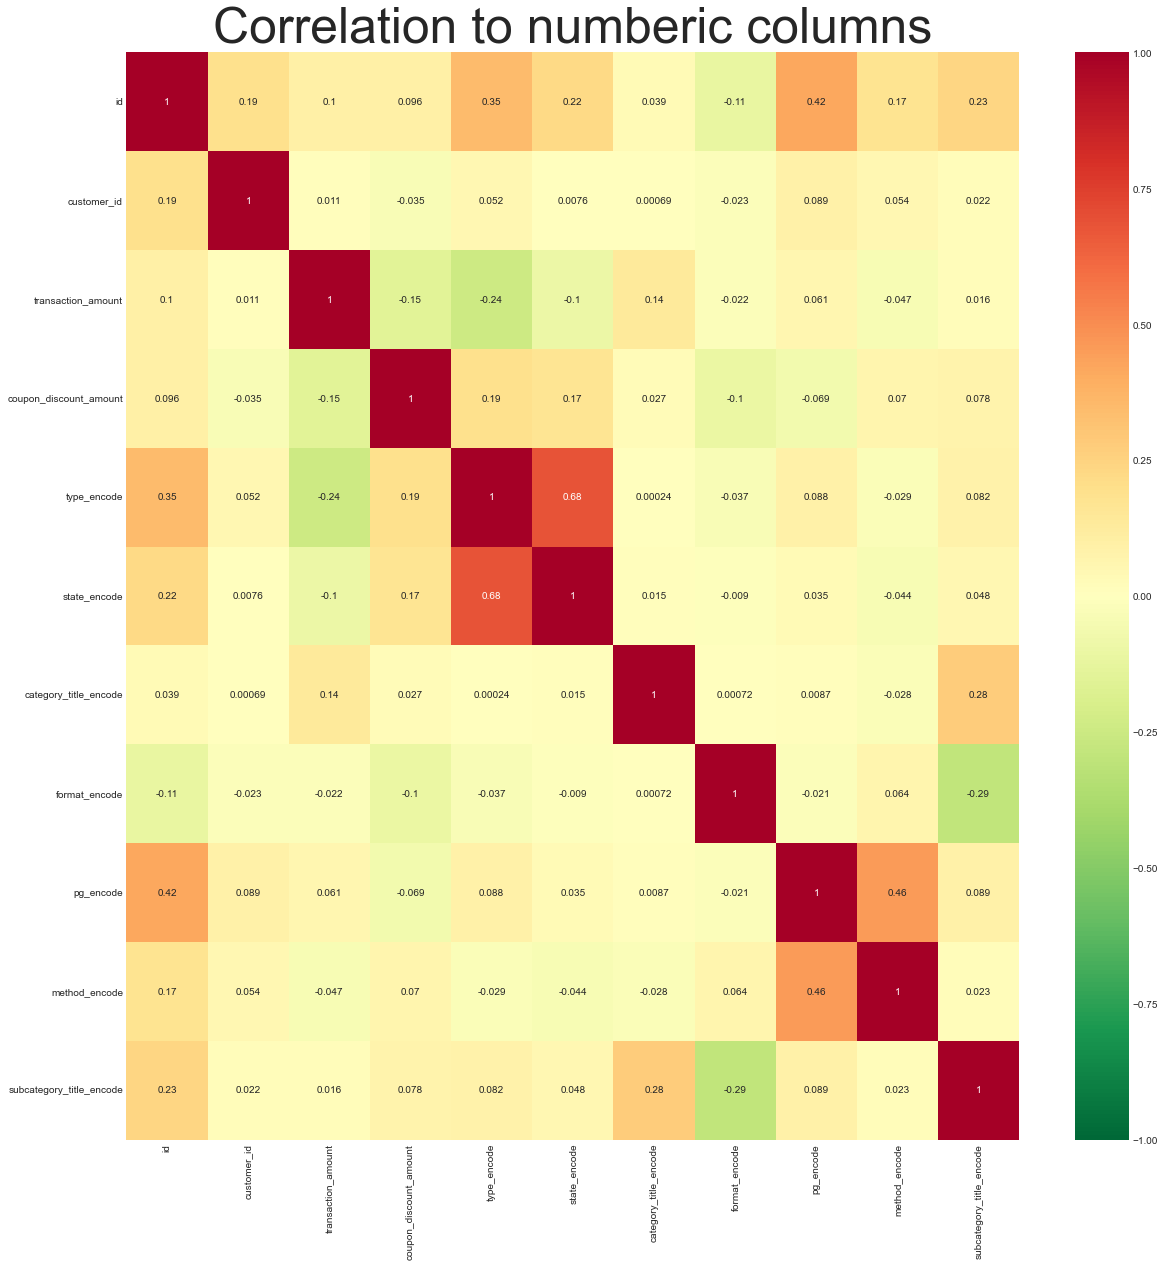

In [120]:
#heatmap으로 상관관계를 표시
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)
plt.title('Correlation to numberic columns', fontsize=50)
sns.heatmap(fastcampus_copy.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'RdYlGn_r',
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )


# 결론: 상관관계도 에서는 눈에 띄게 관계가 있지는 않은것으로 판단. 다만 type, state 간의 데이터를 보면 결제 시스템에서 고객들이 살까 말까하는 심리적인 작용이 컸던 것으로 판단.